# Introduction to Data Visualization with matplotlib

In [1]:
# Setup header
import calendar
import matplotlib.pyplot as plt
import pandas as pd

austin_weather = pd.read_csv('austin_weather.csv')
climate_change = pd.read_csv('climate_change.csv', parse_dates=True, index_col='date')
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)
seattle_weather = pd.read_csv('seattle_weather.csv')
summer_2016 = pd.read_csv('summer2016.csv')

austin_weather['MONTH'] = austin_weather['DATE'].map(lambda x: calendar.month_abbr[x])
seattle_weather['MONTH'] = seattle_weather['DATE'].map(lambda x: calendar.month_abbr[x])
seattle_weather = seattle_weather[seattle_weather['NAME'] == 'SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US']

## Introduction to matplotlib

### Using the `matplotlib.pyplot` interface

The lesson starts off with a sort of "hello world" with a blank plot:

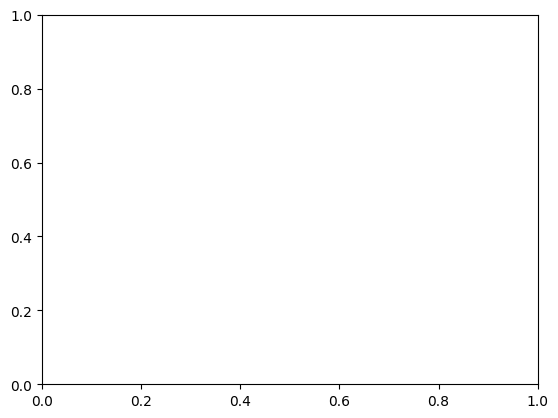

In [2]:
fig, ax = plt.subplots()

The lesson then advances fairly quickly by showing us how to plot two line plots in the same figure:

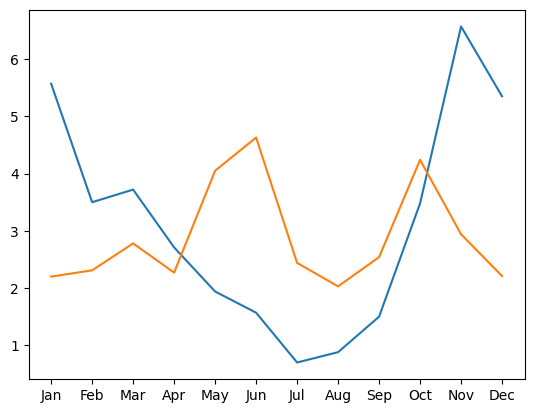

In [3]:
fig, ax = plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

### Customizing data appearance

Here several aesthetic settings are altered to make it clear the line plots observe changes from one month to the next (as opposed to being continous) and ensure the distinctiveness of the two plots:

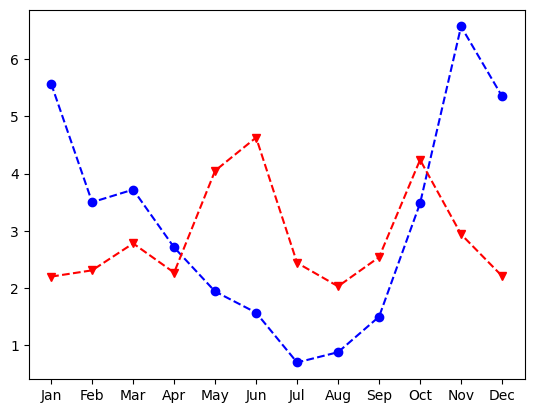

In [4]:
fig, ax = plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color='b', marker='o', linestyle='--')
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color='r', marker='v', linestyle='--')

### Creating a grid of subplots

Here's how to create three rows and two columns worth of empty plots to be filled in later:

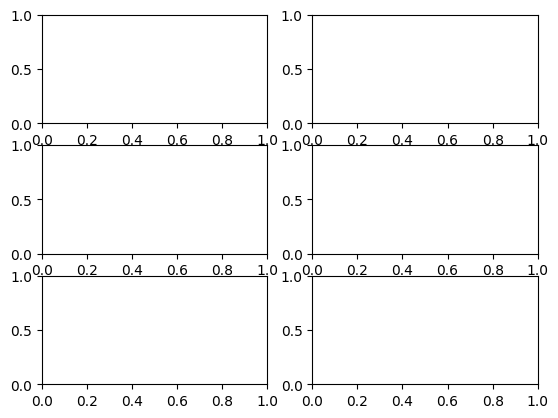

In [5]:
fig, ax = plt.subplots(3, 2)

### Creating small multiples with plt.subplots

Here are some (unlabeled) plots depicting monthly precepitation and average temperature in Seattle and Austin respectively:

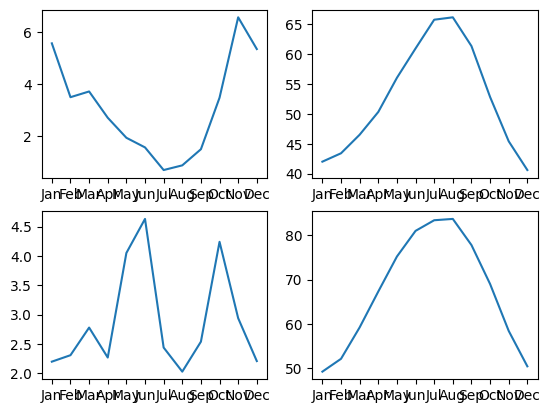

In [6]:
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])

### Small multiples with shared y-axis

Here are two more (unlabeled) plots of the average monthly precipitation in Seattle and Austin, respectively, with dashed lines for the 25th and 75th percentiles above and below and a shared y-axis through `sharey=True` to make sure of apples-to-apples-comparisons:

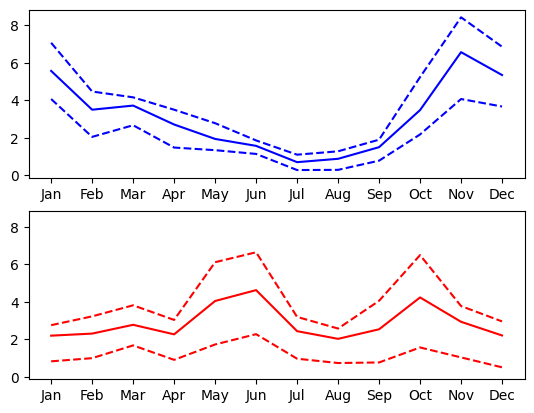

In [7]:
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color='b', linestyle='--')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color='b', linestyle='--')

# Plot Austin precipitation in the bottom axes
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color='r', linestyle='--')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color='r', linestyle='--')

## Plotting time series

### Read data with a time index

(Refer to how `climate_change` was loaded in the header)

### Plot time series data

Here it is shown to be possible to use the index of a `DataFrame` as the x-axis of a plot. Because the index is a `DateTimeIndex`, the formatting will be automatic:

Text(0, 0.5, 'Relative temperature (Celsius)')

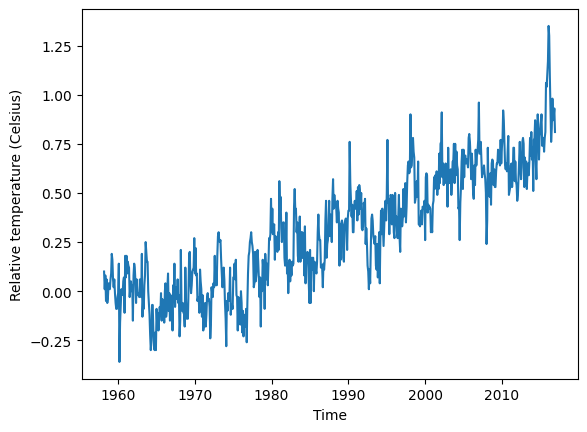

In [8]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['relative_temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Relative temperature (Celsius)')

In [9]:
climate_change.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

### Using a time index to zoom in

Index slicing works much as shown in the Data Manipulation with Pandas course (note the missing value in December 1975):

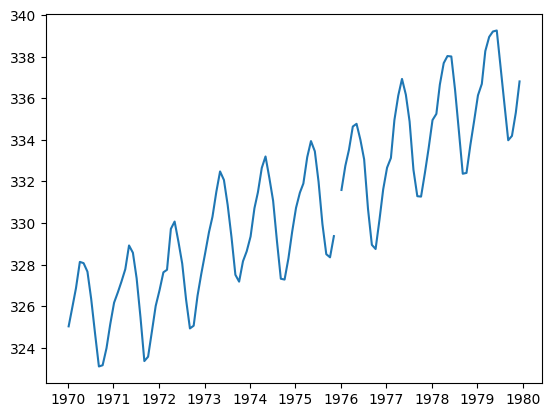

In [10]:
fig, ax = plt.subplots()
seventies = climate_change['1970-01-01':'1979-12-31']
ax.plot(seventies.index, seventies['co2'])

### Plotting two variables

In this example, two plots are made with the same x-axis and two distinct y-axes on the left and right. Color is used to distinguish the two plots:

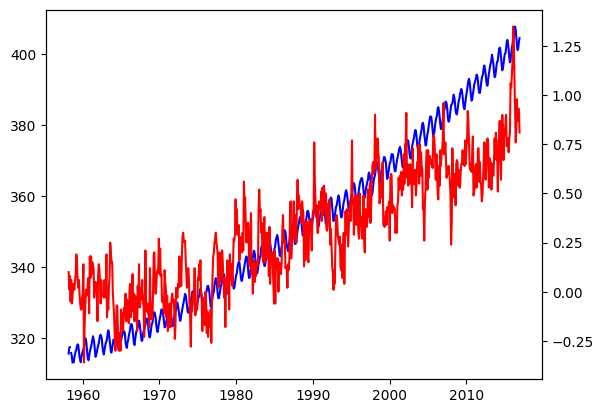

In [11]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['co2'], color='blue')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

### Defining a function that plots time-series data

Here the lesson is getting us into the DRY principle:

In [12]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

### Using a plotting function

Here's `plot_timeseries()` in action, plotting `co2` and `relative_temp` with code duplication at a minimum:

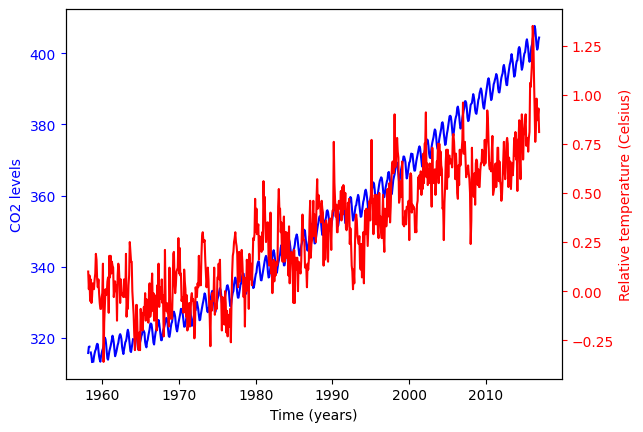

In [13]:
fig, ax = plt.subplots()

plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temperature (Celsius)')

### Annotating a plot of time series data

Here's where things get a little fiddly. The following code attaches text to the time series of relative temperature showing where that time series first exceeded 1° Celsius:

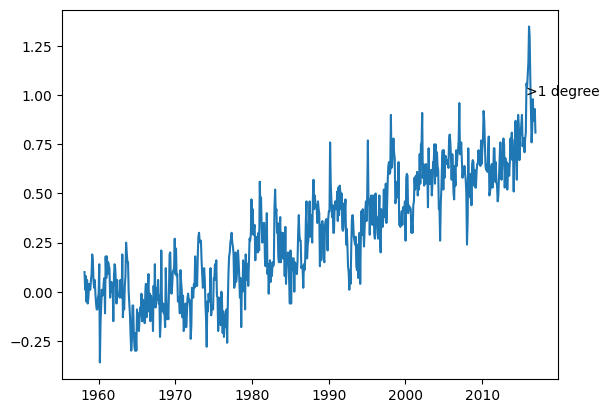

In [14]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['relative_temp'])
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))
plt.show()

### Plotting time series: putting it all together

The final exercise of the second part shows us how to plot two time series together with color to distinguish them and an arrow pointing to a point of interest on the second time series with text at a suitable distance away to avoid confusing clutter:

Text(2008-10-06 00:00:00, -0.2, '>1 degree')

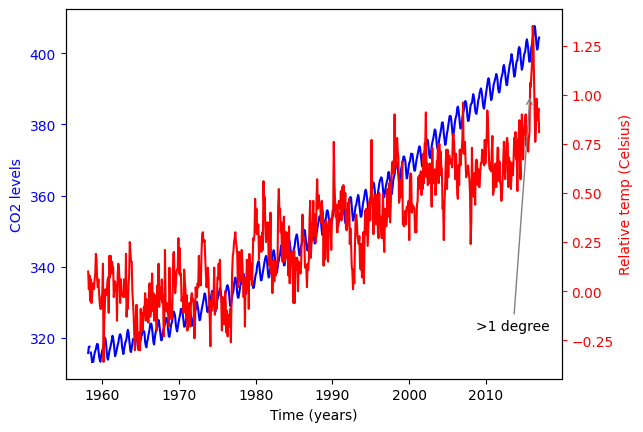

In [15]:
fig, ax = plt.subplots()

plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle': '->', 'color': 'gray'})

## Quantitative comparisons and statistical visualizations

### Bar chart

With a small modification to avoid a warning and a clearer y-axis label, here's how to make a bar plot with countries on the x-axis and number of **gold** medals on the y-axis:

Text(0, 0.5, 'Number of gold medals')

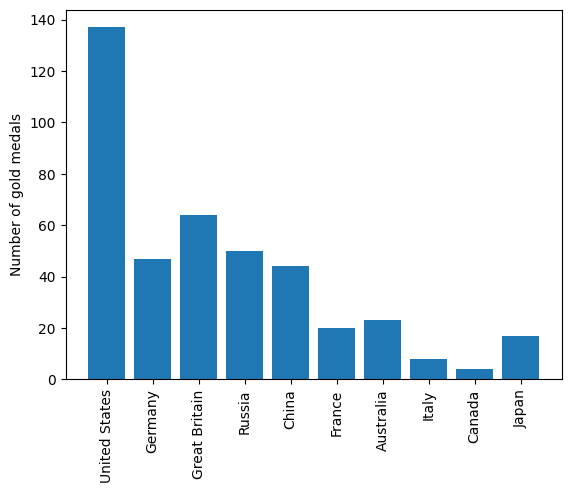

In [16]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals['Gold'])
ax.tick_params('x', rotation=90)
ax.set_ylabel('Number of gold medals')

Can I do better? How about a *sorted* bar chart?

Text(0, 0.5, 'Number of gold medals')

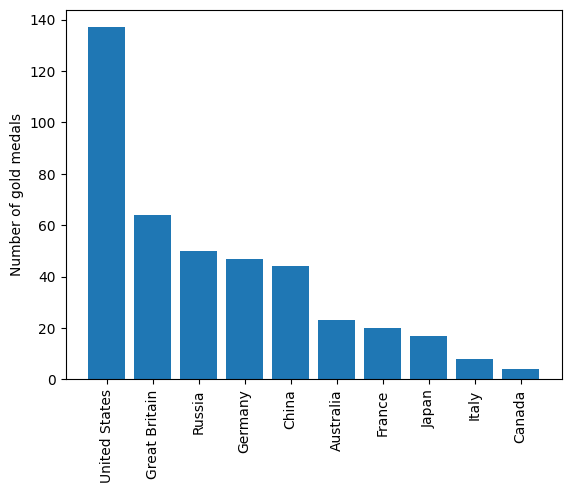

In [17]:
medals_sorted_by_gold = medals.sort_values('Gold', ascending=False)
fig, ax = plt.subplots()

ax.bar(medals_sorted_by_gold.index, medals_sorted_by_gold['Gold'])
ax.tick_params('x', rotation=90)
ax.set_ylabel('Number of gold medals')

### Stacked bar chart

Here is what a *stacked* bar chart showing the sum of bronze, silver and gold medals looks like:

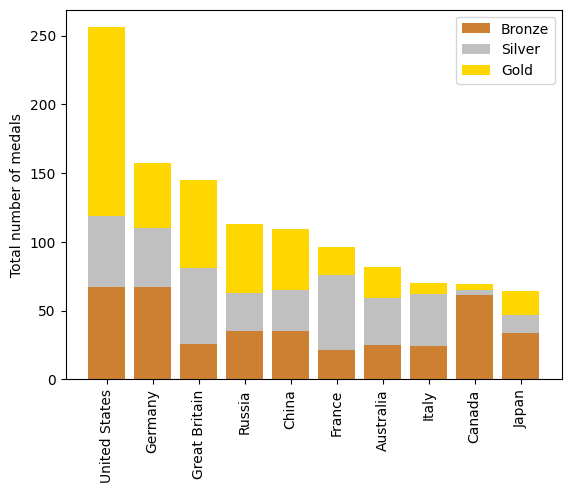

In [18]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals['Bronze'], label='Bronze', color='#CD7F32')
ax.bar(medals.index, medals['Silver'], bottom=medals['Bronze'], label='Silver', color='#C0C0C0')
ax.bar(medals.index, medals['Gold'], bottom=medals['Bronze'] + medals['Silver'], label='Gold', color='#FFD700')
ax.tick_params('x', rotation=90)
ax.set_ylabel('Total number of medals')
ax.legend()

### Creating histograms

First, two subsets of `summer_2016`, `mens_rowing` and `mens_gymnastics`, will be needed:

In [19]:
mens_rowing = summer_2016[(summer_2016['Sex'] == 'M') & (summer_2016['Sport'] == 'Rowing')]
mens_rowing

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
78,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
93,14871,8025,Thomas Gabriel Jrmie Baroukh,M,28.0,183.0,70.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Bronze
97,15215,8214,Jacob Jepsen Barse,M,27.0,188.0,73.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Silver
119,18441,9764,Alexander Belonogoff,M,26.0,187.0,90.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,252281,126330,Giuseppe Vicino,M,23.0,195.0,95.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Fours,Bronze
1905,258859,129601,Phillipp Wende,M,31.0,199.0,90.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,Gold
1919,260260,130259,Peter Noel Jan Wiersum,M,31.0,173.0,55.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,Bronze
1920,260338,130298,Tone Wieten,M,22.0,201.0,102.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,Bronze


In [20]:
mens_gymnastics = summer_2016[(summer_2016['Sex'] == 'M') & (summer_2016['Sport'] == 'Gymnastics')]
mens_gymnastics

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
5,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
6,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze
122,18577,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
123,18579,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,261563,130874,Nile Wilson,M,20.0,166.0,60.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,Bronze
1956,264454,132340,Koji Yamamuro,M,27.0,159.0,58.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Gold
1978,266171,133174,You Hao,M,24.0,162.0,60.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Bronze
1986,267709,133931,Arthur Nabarrete Zanetti,M,26.0,156.0,61.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Silver


Now it's time to plot two overlapping histograms of weight in kilograms for the two categories of men's sports. Rowers are apparently a bit chonkier and more muscular than their gymnast counterparts:

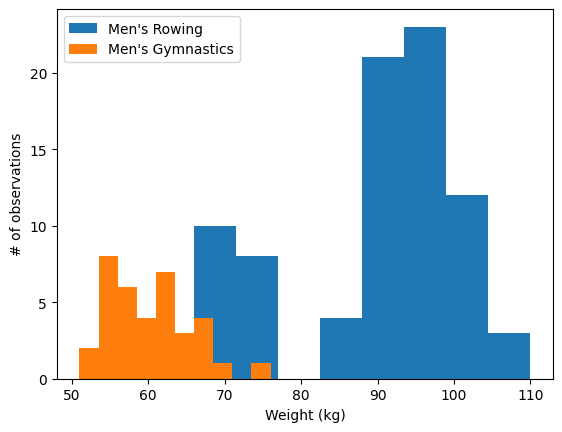

In [21]:
fig, ax = plt.subplots()

ax.hist(mens_rowing['Weight'], label="Men's Rowing")
ax.hist(mens_gymnastics['Weight'], label="Men's Gymnastics")
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('# of observations')
plt.legend()

Here is a further example with restricted number of bins and a "step" style of histograms:

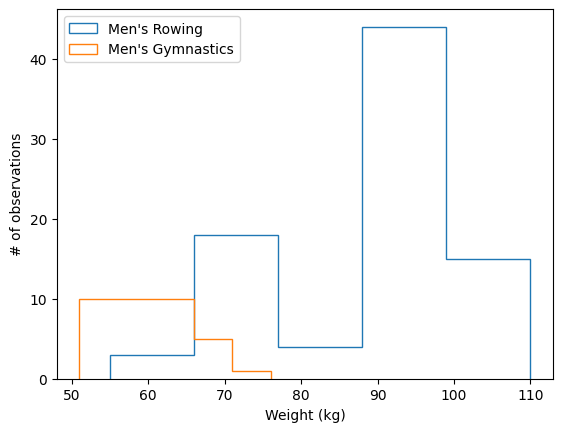

In [22]:
fig, ax = plt.subplots()

ax.hist(mens_rowing['Weight'], label="Men's Rowing", bins=5, histtype='step')
ax.hist(mens_gymnastics['Weight'], label="Men's Gymnastics", bins=5, histtype='step')
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('# of observations')
ax.legend()

### Adding error bars to a bar chart

Fairly self-explanatory. The non-overlap of the error bars appears to make us pretty sure that these are two distinct populations:

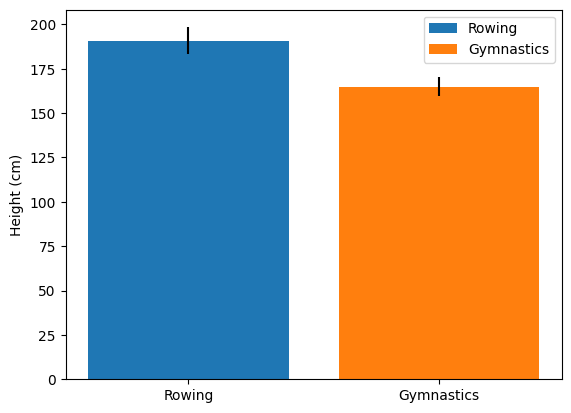

In [23]:
fig, ax = plt.subplots()

ax.bar('Rowing', mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std(), label='Rowing')
ax.bar('Gymnastics', mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std(), label='Gymnastics')
ax.set_ylabel('Height (cm)')
ax.legend()

### Adding error bars to a plot

Here it is shown how to render line plots with error bars based on the already existing standard deviation columns in two `DataFrame`s:

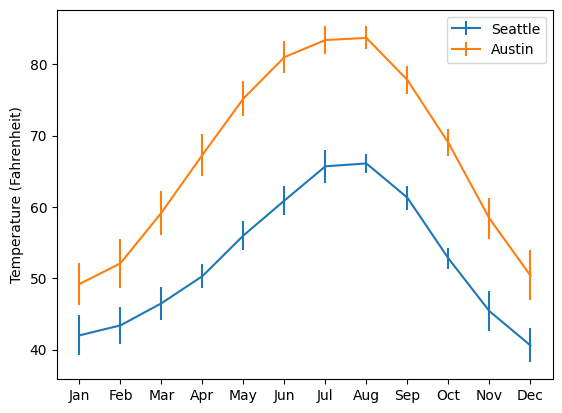

In [24]:
fig, ax = plt.subplots()

ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], seattle_weather['MLY-TAVG-STDDEV'], label='Seattle')
ax.errorbar(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'], austin_weather['MLY-TAVG-STDDEV'], label='Austin')
ax.set_ylabel('Temperature (Fahrenheit)')
ax.legend()

### Creating box plots

Here's a simple and straightforward box plot example:

Text(0, 0.5, 'Height (cm)')

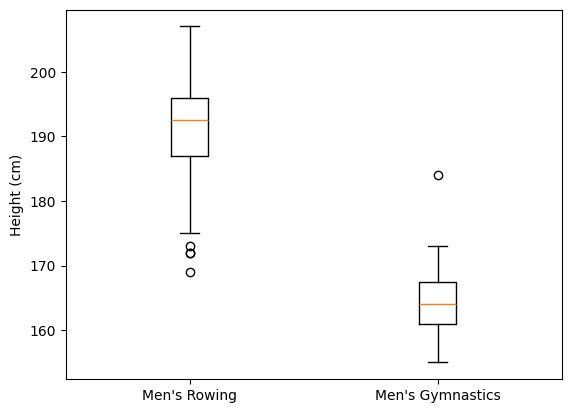

In [25]:
fig, ax = plt.subplots()

ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])
ax.set_xticklabels(["Men's Rowing", "Men's Gymnastics"])
ax.set_ylabel('Height (cm)')

### Simple scatter plot

Another example with a scatter plot this time, suggesting a more or less linear relationship between CO2 (ppm) and relative temperature:

Text(0, 0.5, 'Relative temperature (C)')

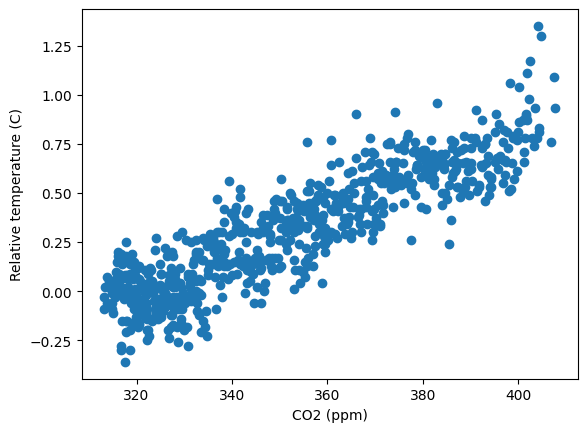

In [26]:
fig, ax = plt.subplots()

ax.scatter(climate_change['co2'], climate_change['relative_temp'])
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temperature (C)')

### Encoding time by color

Here is a more sophisticated scatter plot with substantial modifications to what was in the DataCamp lesson. There's a colormap that more or less suggests "colder to hotter" and thin edges for the data points to make pale ones stand out:

Text(0, 0.5, 'Relative temperature (C)')

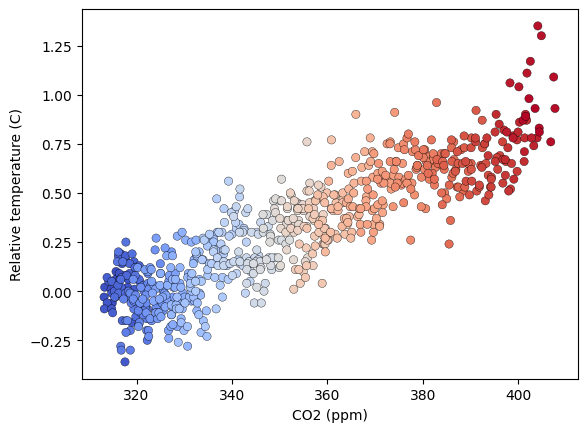

In [27]:
fig, ax = plt.subplots()

ax.scatter(
    climate_change['co2'],
    climate_change['relative_temp'],
    c=climate_change.index,
    cmap='coolwarm',
    edgecolor='black',
    linewidth=0.25
)
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temperature (C)')

## Sharing visualizations with others

### Switching between styles

Here's a style borrowed from R's ggplot2 package:

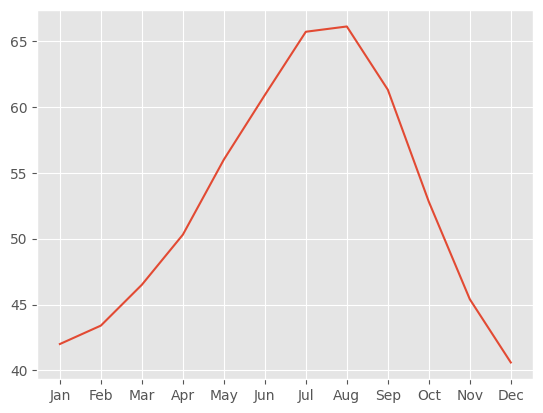

In [28]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

And here's a style based on the light "Solarized" color theme for editors and terminals:

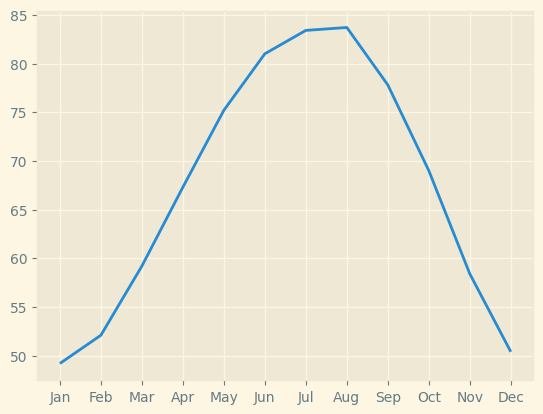

In [29]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])

In [30]:
# Resetting style
plt.style.use('default')

### Saving a file several times / Save a figure with different sizes

Since I was pleased with how I fine-tuned the stacked bar chart of Olympic medals, I'm going to be using that example for saving plots to disk:

In [31]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals['Bronze'], label='Bronze', color='#CD7F32')
ax.bar(medals.index, medals['Silver'], bottom=medals['Bronze'], label='Silver', color='#C0C0C0')
ax.bar(medals.index, medals['Gold'], bottom=medals['Bronze'] + medals['Silver'], label='Gold', color='#FFD700')
ax.tick_params('x', rotation=90)
ax.set_ylabel('Total number of medals')
ax.legend()

fig.savefig('my_figure.png')
fig.savefig('my_figure_300dpi.png', dpi=300)
fig.set_size_inches([3, 5])
fig.savefig('figure_3_5.png')
fig.set_size_inches([5, 3])
fig.savefig('figure_5_3.png')

plt.close()

### Unique values of a column

In this instance, I'm going to sort them, deviating from the DataCamp lesson:

In [32]:
sports = summer_2016['Sport'].unique()
sports.sort()
sports

array(['Archery', 'Athletics', 'Badminton', 'Basketball',
       'Beach Volleyball', 'Boxing', 'Canoeing', 'Cycling', 'Diving',
       'Equestrianism', 'Fencing', 'Football', 'Golf', 'Gymnastics',
       'Handball', 'Hockey', 'Judo', 'Modern Pentathlon',
       'Rhythmic Gymnastics', 'Rowing', 'Rugby Sevens', 'Sailing',
       'Shooting', 'Swimming', 'Synchronized Swimming', 'Table Tennis',
       'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Volleyball',
       'Water Polo', 'Weightlifting', 'Wrestling'], dtype=object)

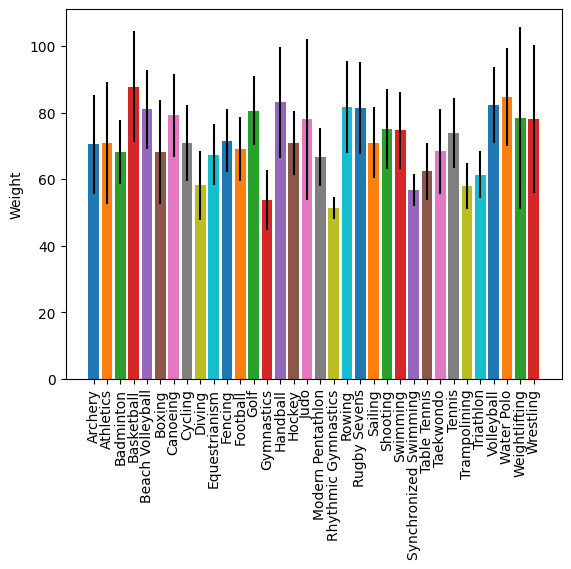

In [33]:
fig, ax = plt.subplots()

for sport in sports:
  sport_df = summer_2016[summer_2016['Sport'] == sport]
  ax.bar(sport, sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.tick_params('x', rotation=90)

# The DataCamp lesson saves to a file but that will be omitted here